# k-Nearest Neighbors

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. 

<div>
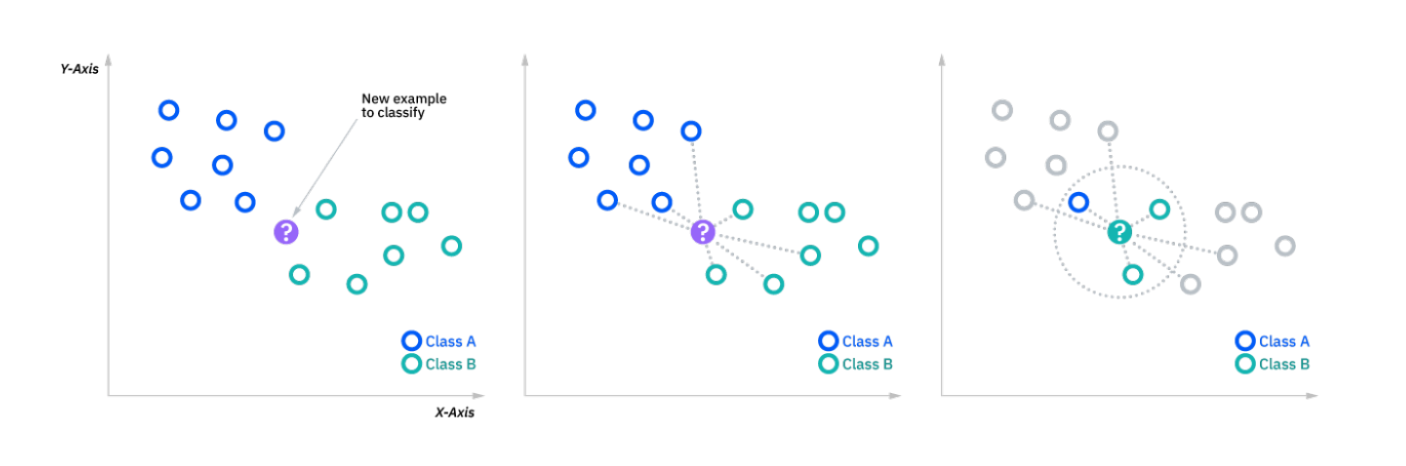
<div>

    

    

## Compute KNN: distance metrics

Two common distance metrics: Euclidean distance and Manhattan distance.

- Euclidean distance (p=2): This is the most commonly used distance measure, and it is limited to real-valued vectors.
$$d(x, y) = \sqrt{\sum_{i=1}^{n}(y_i - x_i)^2}$$
- Manhattan distance (p=1): This is also another popular distance metric, which measures the absolute value between two points.
$$d(x, y) = \sum_{i = 1}^{m} |x_i - y_i|$$

## Compute KNN: defining k

The k value in the k-NN algorithm defines how many neighbors will be checked to determine the classification of a specific query point. For example, if k=1, the instance will be assigned to the same class as its single nearest neighbor. Defining k can be a balancing act as different values can lead to overfitting or underfitting. Lower values of k can have high variance, but low bias, and larger values of k may lead to high bias and lower variance. The choice of k will largely depend on the input data as data with more outliers or noise will likely perform better with higher values of k. 

Overall, it is recommended to have an odd number for k to avoid ties in classification, and cross-validation tactics can help you choose the optimal k for your dataset.

### Advantages of KNN:

- Simple and easy to implement
- Non-parametric, meaning it does not make any assumptions about the underlying distribution of the data
- Can work well for multi-class classification problems
- Can be effective for small datasets or datasets with non-linear decision boundaries

### Disadvantages of KNN:
- Computationally expensive and slow for large datasets
- Sensitive to the choice of distance metric used to calculate nearest neighbors
- Requires careful selection of the k value, which can significantly impact the performance of the algorithm
- Can be negatively affected by the presence of irrelevant or noisy features in the dataset

---
## Perform KNN 

### Import library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine


### Load the wine dataset

In [3]:
df = load_wine()
X = df.data
y = df.target
pd.DataFrame(df.data, columns = df.feature_names).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Visualize the data

Choose two variable(alcohol, color_intensity) to plot 2-D scatter plot

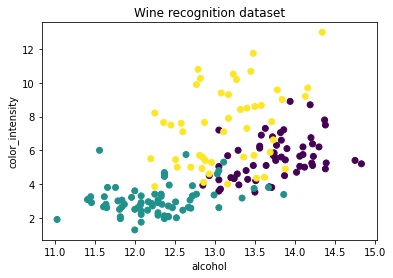

In [4]:
# Plot
plt.scatter(df['data'][:, 0], df['data'][:, 9], c=df['target'])
plt.title('Wine recognition dataset')
plt.xlabel(df['feature_names'][0])
plt.ylabel(df['feature_names'][9])
plt.show()

### Standarize the data

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std[0:5, :]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

### split the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


### Select K

In [8]:
for neighbors in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    print(f"{neighbors} Neighbors F Score: {np.round(f1_score(y_test, knn.predict(X_test), average='weighted'),2)}")

1 Neighbors F Score: 0.96
2 Neighbors F Score: 0.94
3 Neighbors F Score: 0.96
4 Neighbors F Score: 0.96
5 Neighbors F Score: 0.96
6 Neighbors F Score: 0.96


The results indicate that the greatest accuracy is achieved by computing the nearest 1, 3, and 5 neighbors. However, selecting the nearest 1 neighbor may lead to unintended sensitivity if data points start to overlap, while larger neighbor counts may produce instability in regions where neighbors are far from the data point being evaluated. In this case, we will choose 3 neighbors since it offers the same level of accuracy and provides a balance between the potential instability of lower and higher neighbor counts.

### Implement a KNN classifier with k=3

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Error analysis

In [10]:
# Predict the classes of the testing set
y_pred = knn.predict(X_test)

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



F1 score:  0.96


<Figure size 3600x3600 with 0 Axes>

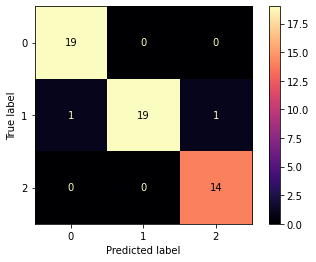

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("F1 score: ", np.round(f1_score(y_test, y_pred, average='weighted'),2))

plt.figure(figsize = (50,50))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'magma')


A F1 score of 0.74 indicates that the model is performing well.

It is also important to consider other factors such as the data quality, the choice of K value, and the feature selection process when evaluating the performance of the KNN model.